In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [127]:
path = "/Users/zamiulalam/Documents/Data Science/EmployeeAtrrition/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)

In [128]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

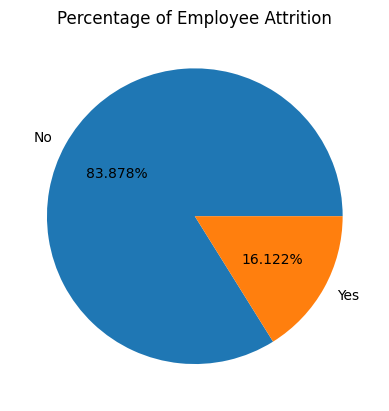

In [130]:
# get the set of distinct classes
labelz = ['No','Yes']

sizes = df.Attrition.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(np.array(sizes), labels=labelz, autopct='%1.3f%%')
ax.set_title('Percentage of Employee Attrition')
plt.show()

In [131]:
df_cat = df.select_dtypes(include = ["object"]).columns
df_num = df.select_dtypes(include = ["int64"]).columns

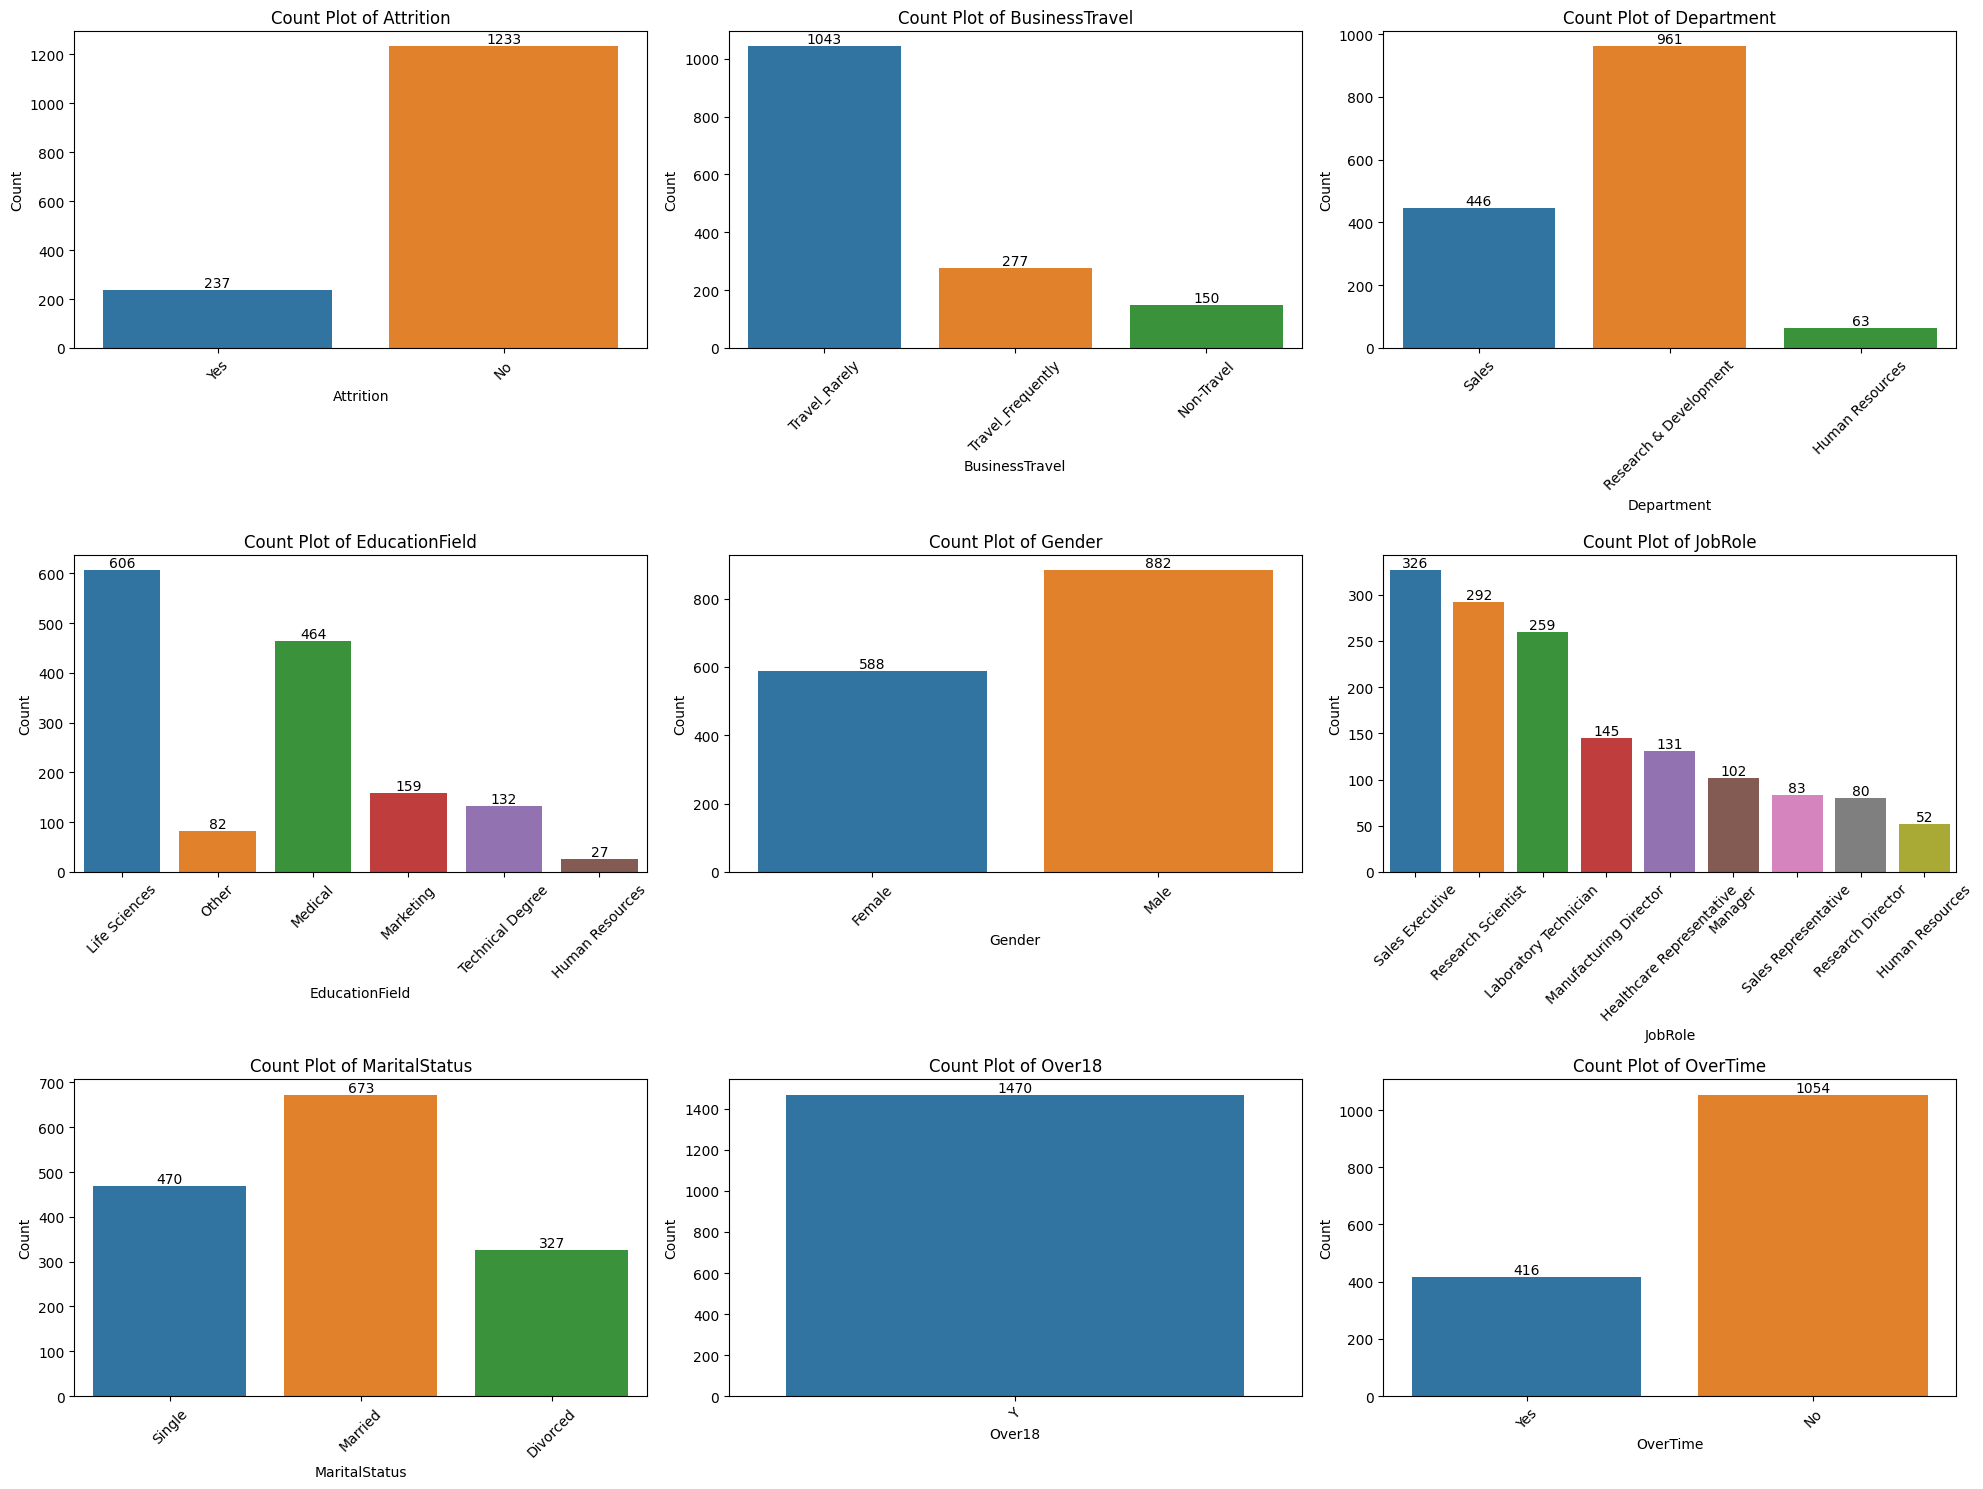

In [132]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, cols in enumerate(df_cat):
    ax = axes[idx]
    sns.countplot(data=df, x=cols, hue=cols, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)  # type: ignore
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Count Plot of {cols}')
    ax.set_xlabel(cols)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We see that all emplyees are over 18. So we can drop that column.

In [133]:
cols_drop = ['Over18']

In [134]:
print(cols_drop)

['Over18']


In [135]:
#df_cat = df_cat.drop(['Over18'])

In [136]:
df_num.size

26

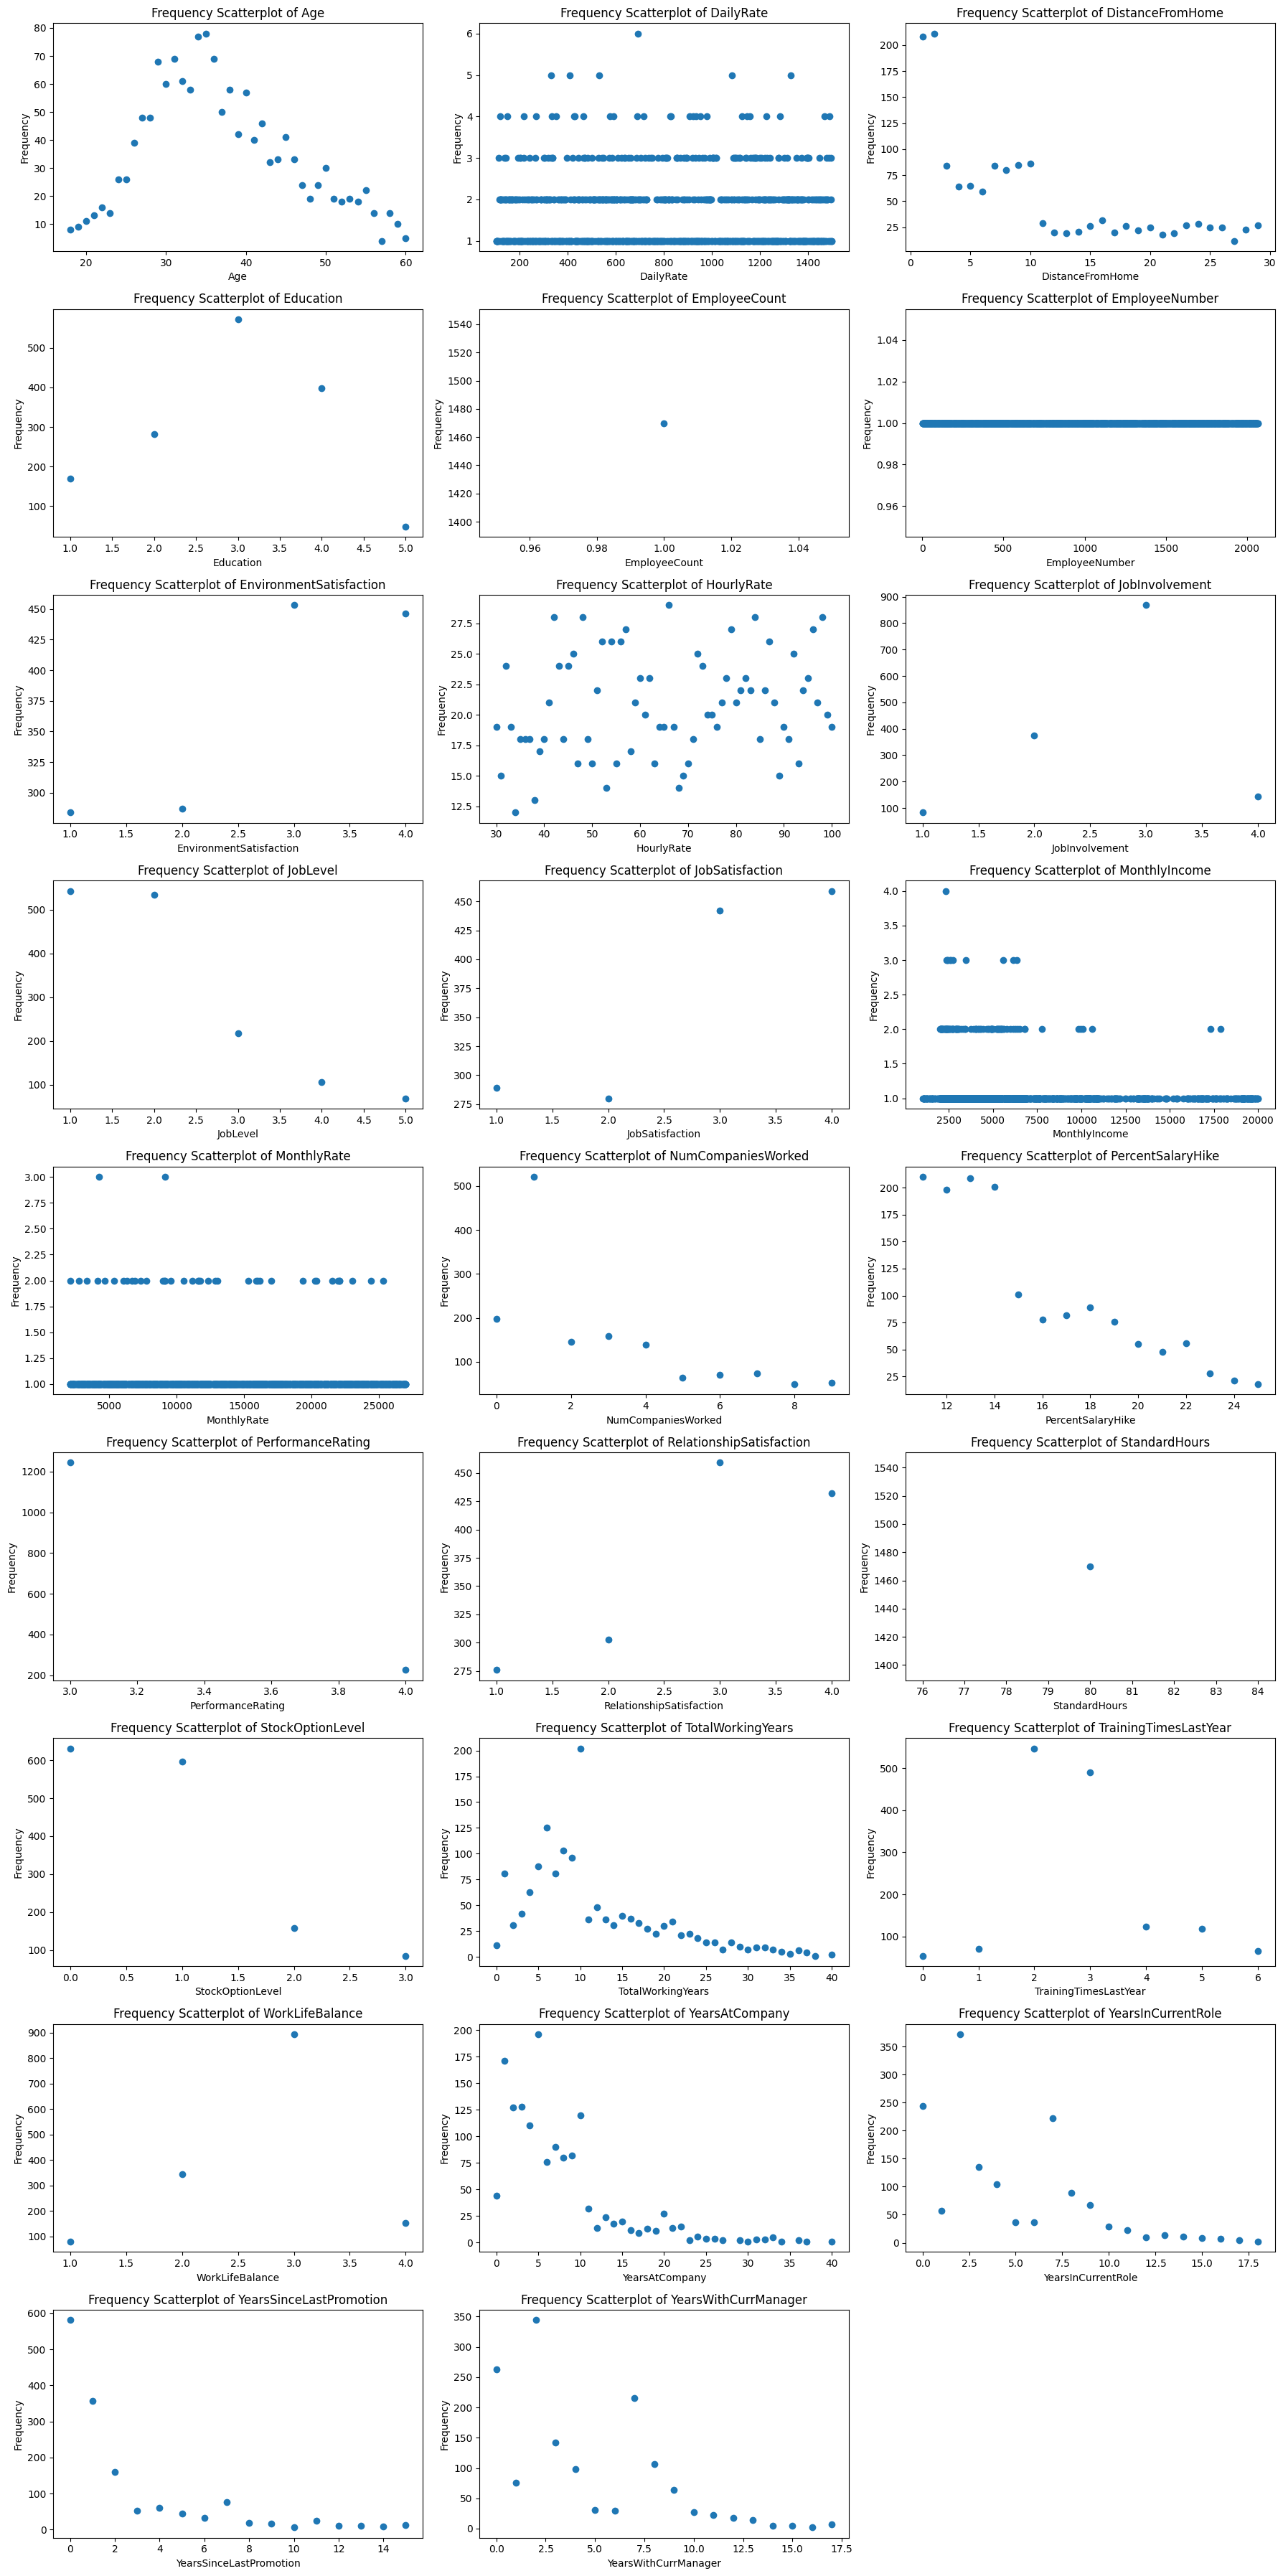

In [137]:
n_cols = 3
n_rows = (len(df_num) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(df_num):
    value_counts = df[col].value_counts().sort_index()
    axes[idx].scatter(value_counts.index, value_counts.values)
    axes[idx].set_title(f'Frequency Scatterplot of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(df_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

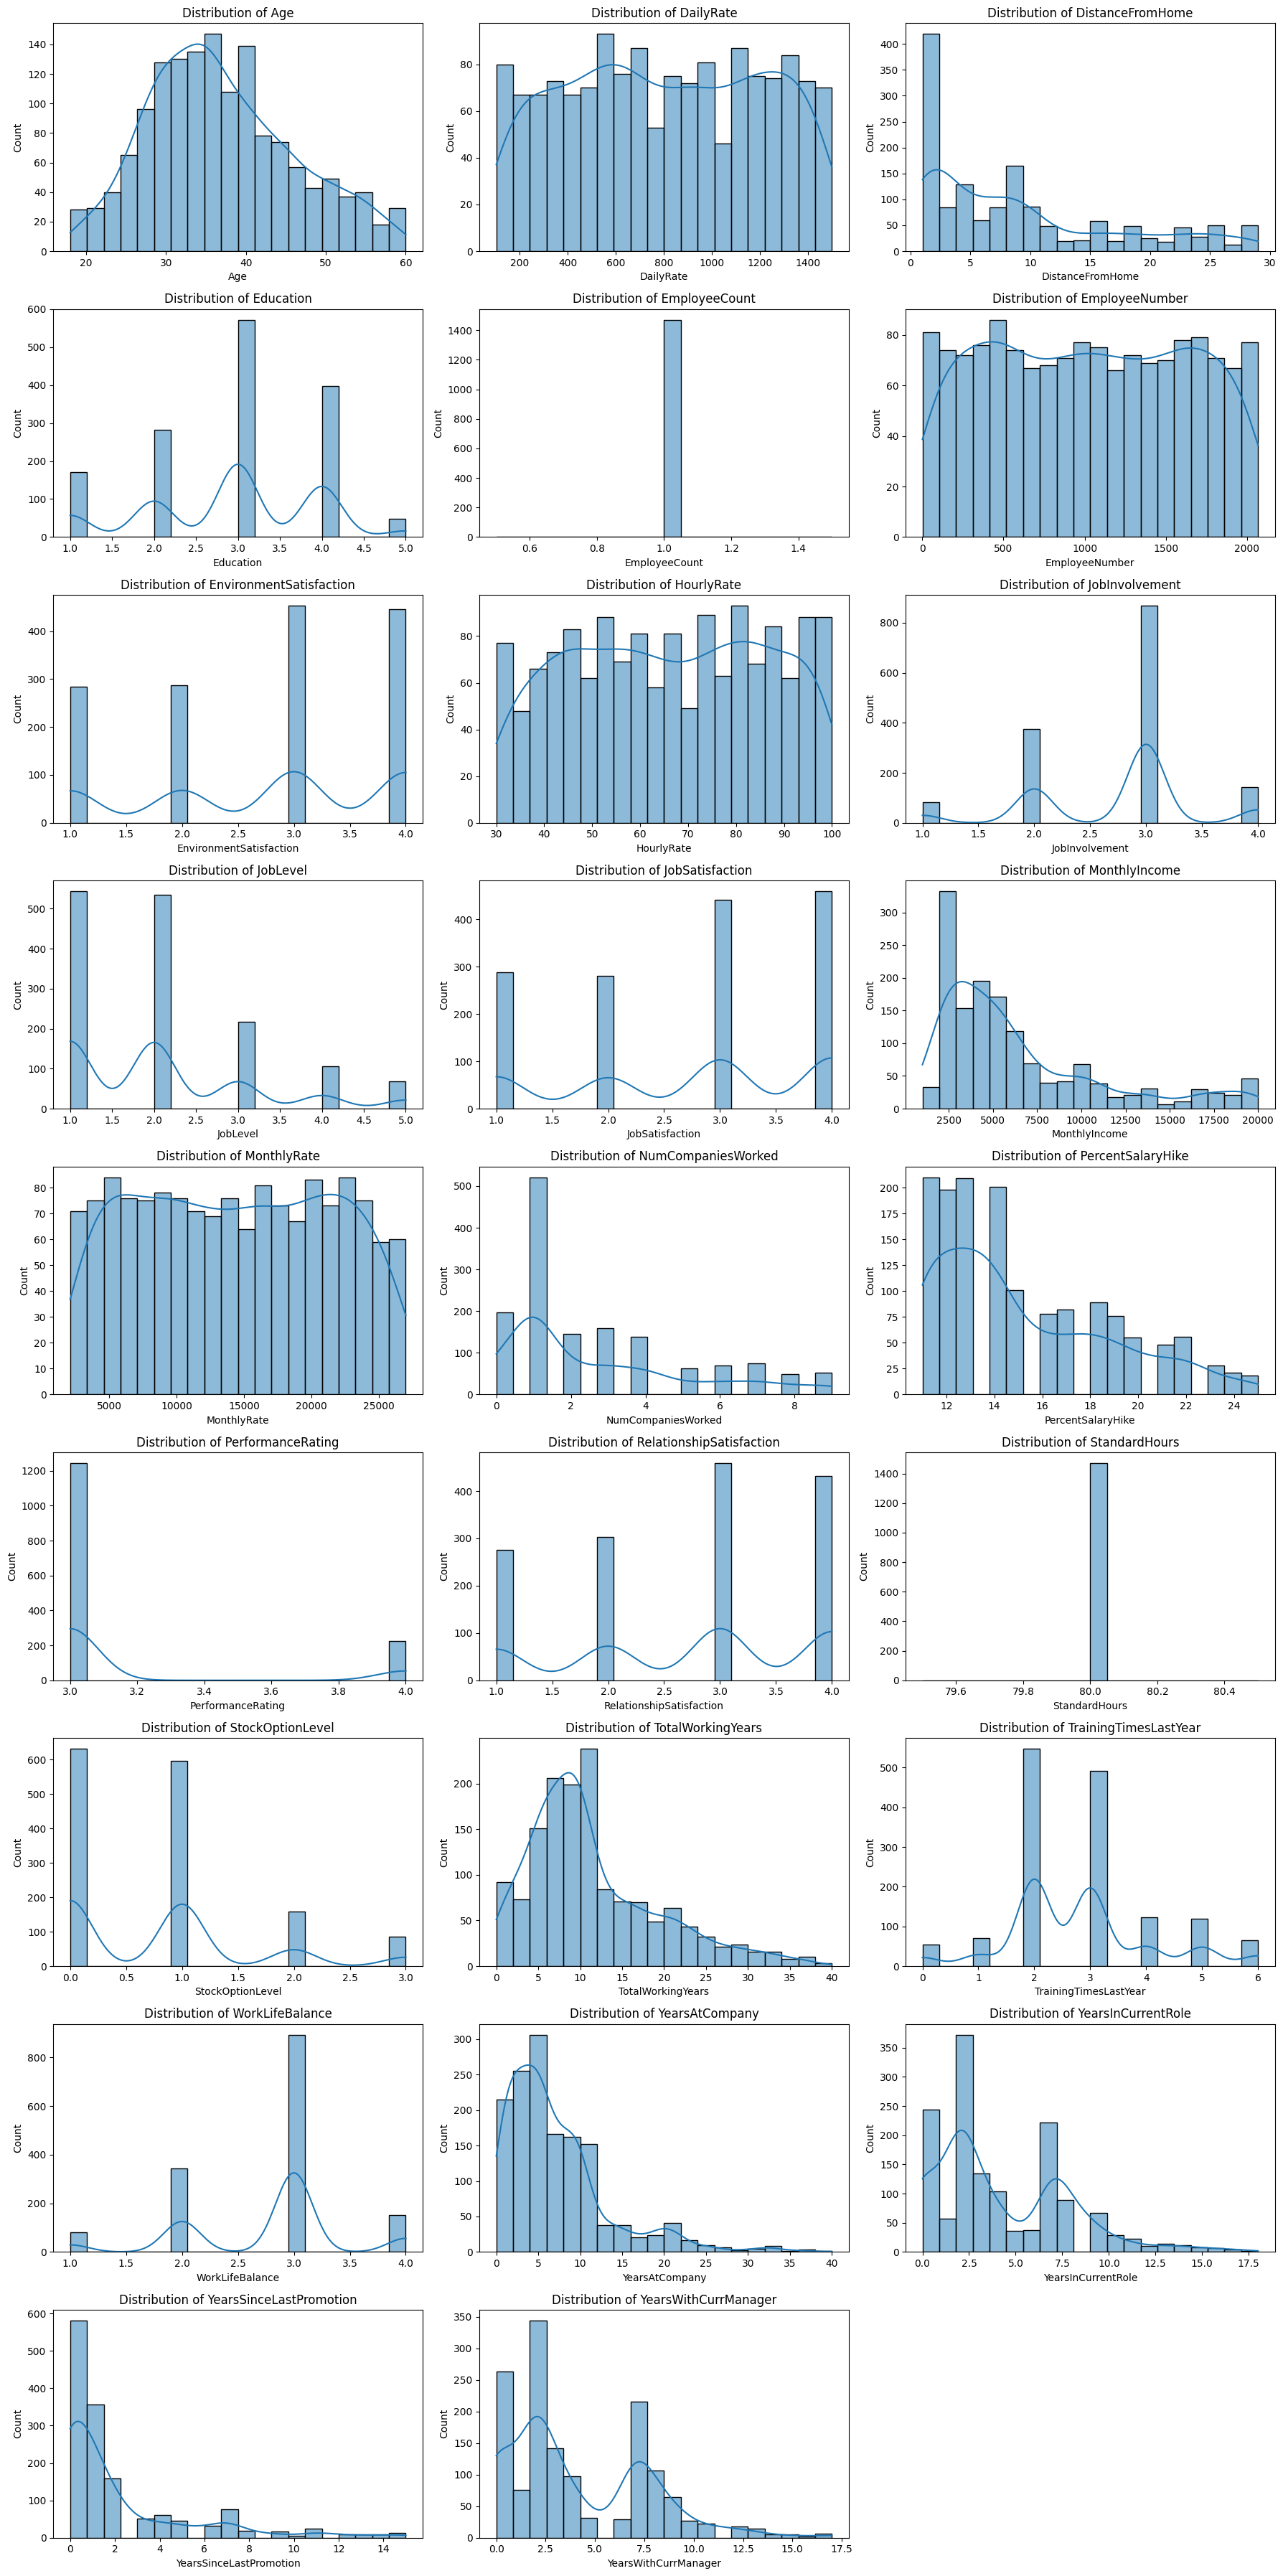

In [138]:
n_cols = 3
n_rows = (len(df_num) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_num):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(len(df_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [139]:
cols_drop.extend(['EmployeeCount','EmployeeNumber', 'StandardHours'])
#df_num = df_num.drop(['EmployeeCount','StandardHours'])

In [140]:
print(cols_drop)

['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours']


In [141]:
df_num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

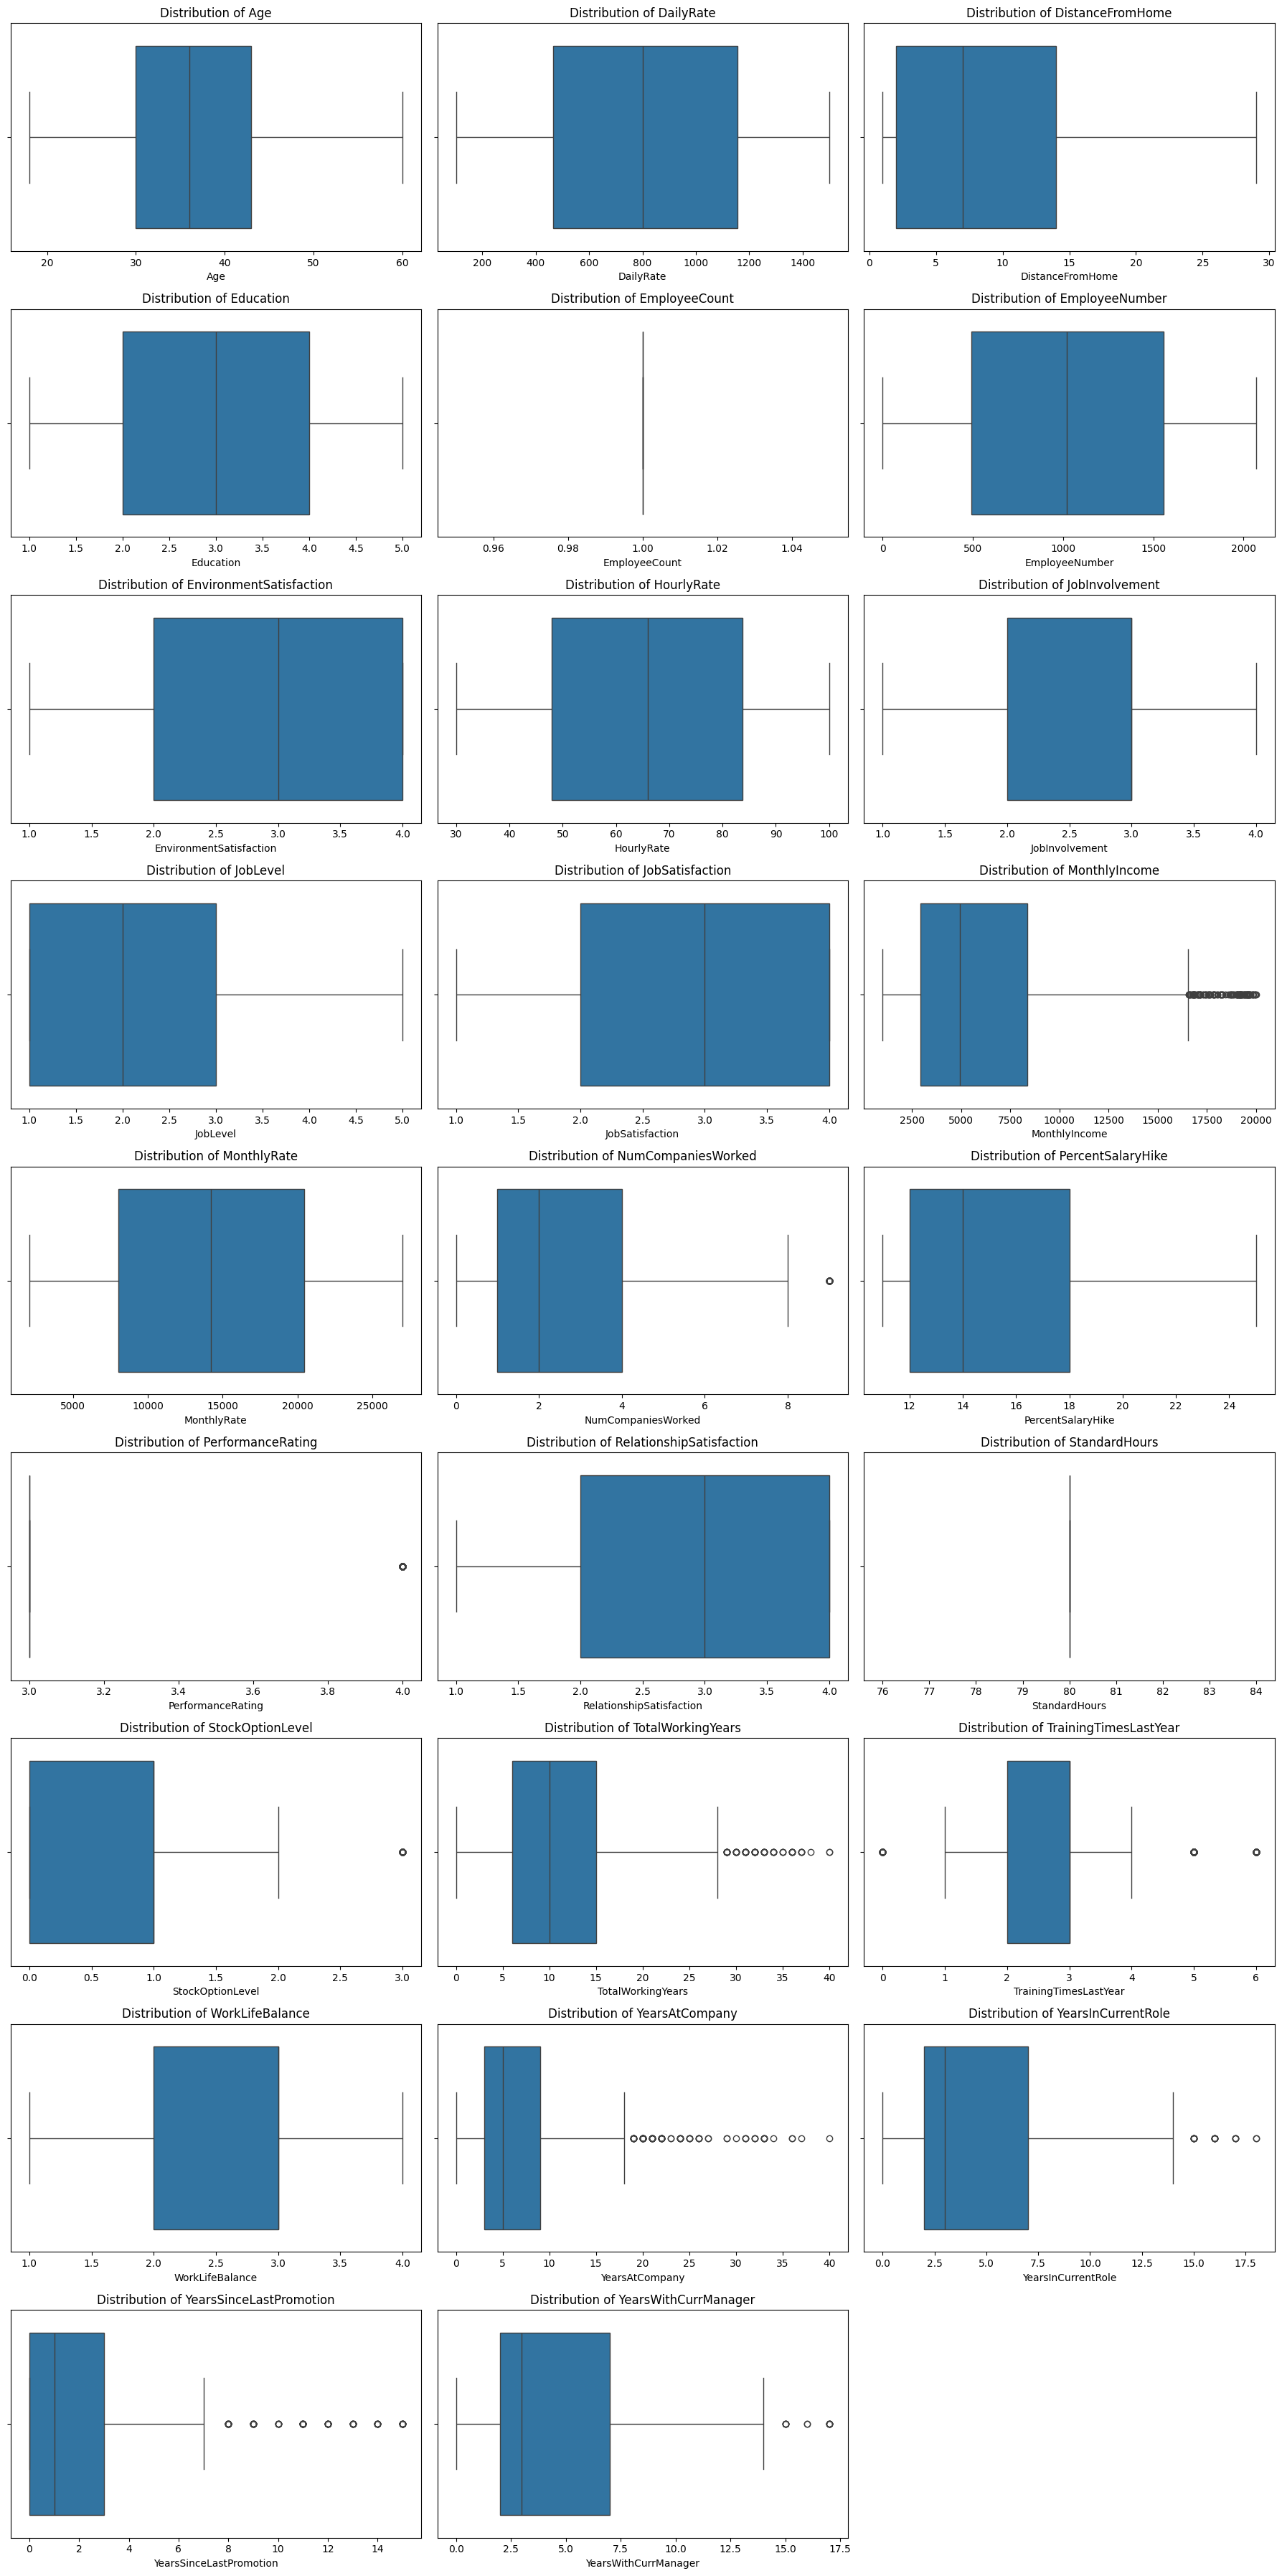

In [142]:
n_cols = 3
n_rows = (len(df_num) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_num):
    ax = axes[i]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(len(df_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

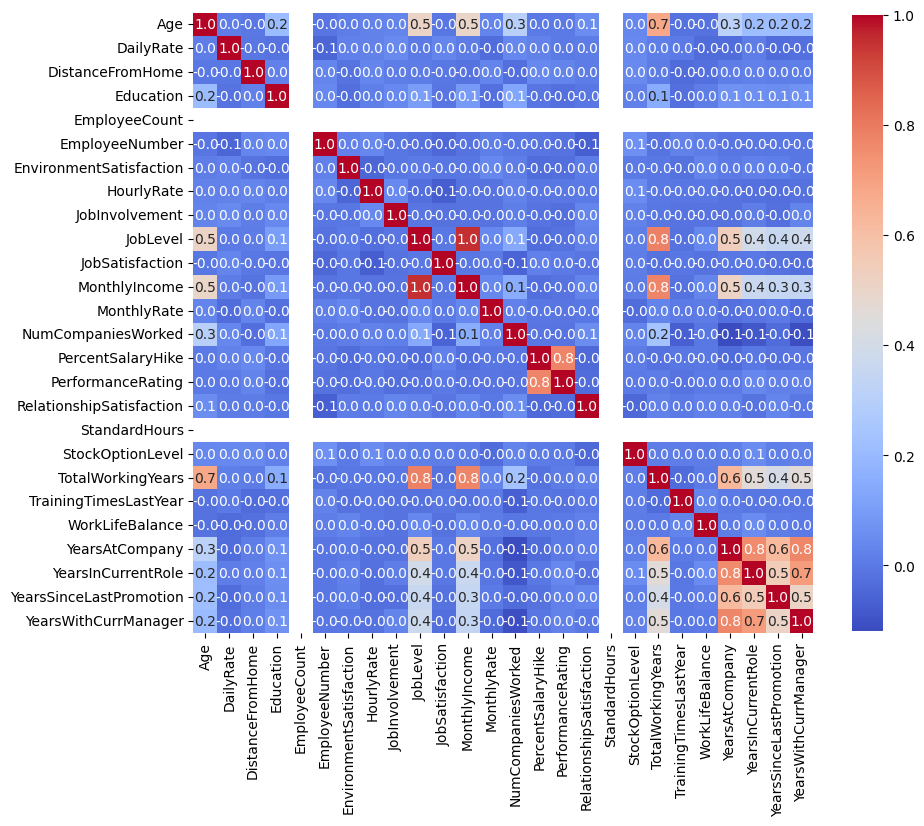

In [143]:
corr_matrix = df[df_num].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
#plt.title(f"Correlation Heatmap for {col_prefix}")
plt.show()

In [144]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] >= 0.7)]

In [145]:
#cols_drop.extend(to_drop)

In [146]:
print(cols_drop)

['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours']


In [147]:
df_num.size

26

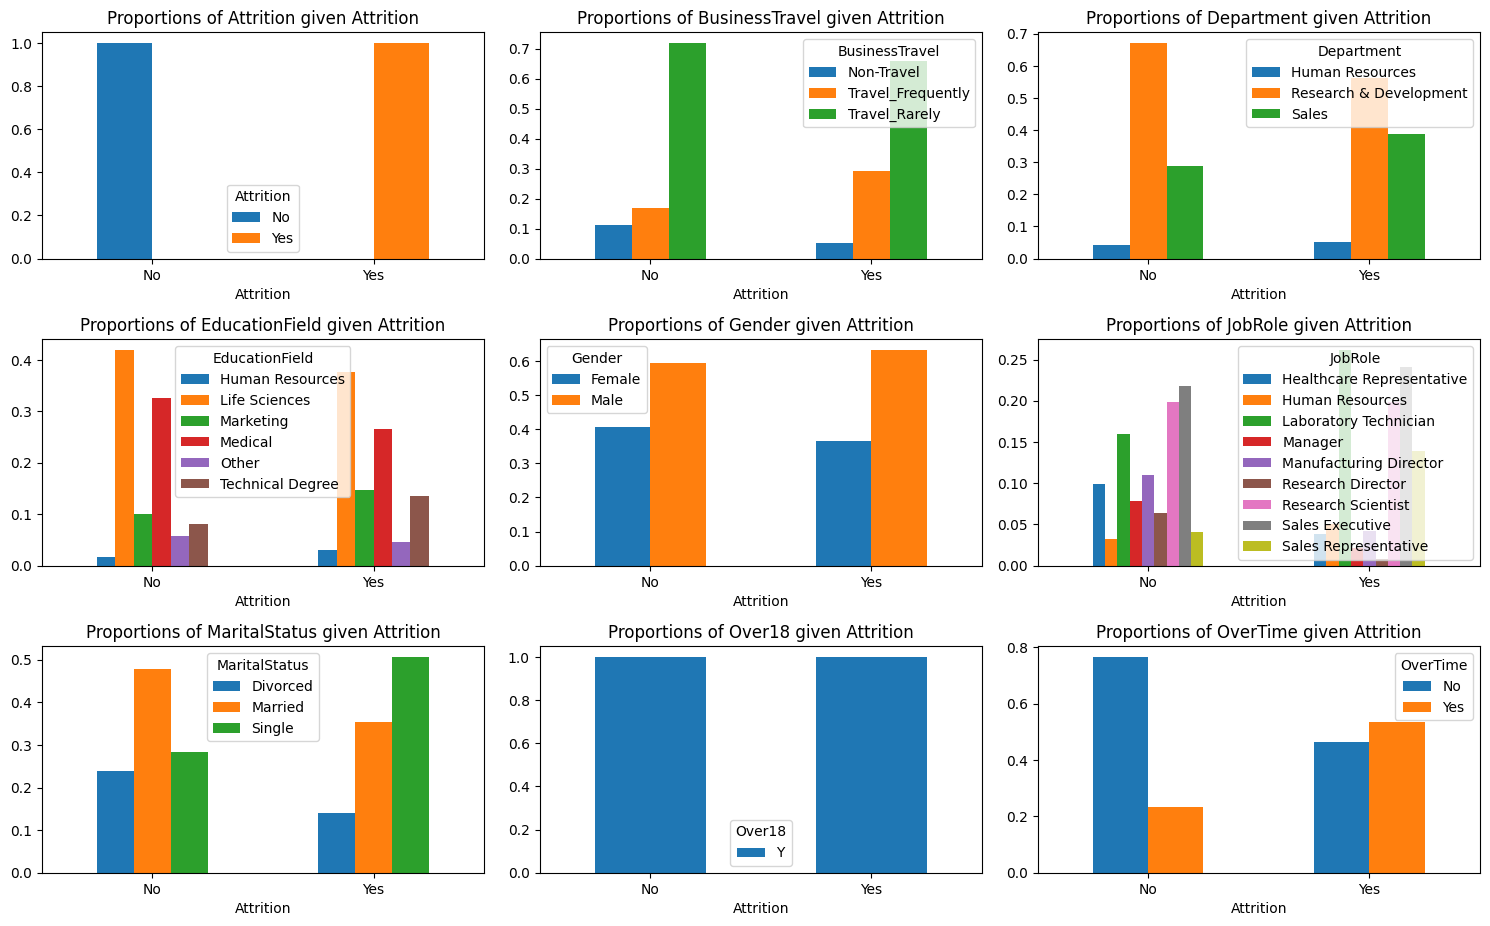

In [148]:
# Plot categories given attrition
plt.figure(figsize=(15, 12))

for i, column in enumerate(df_cat, 1):
    plt.subplot(len(df_cat) // 3 + 1, 3, i)

    prop_table = pd.crosstab(df[column], df['Attrition'], normalize='columns').T

    prop_table.plot(kind='bar', stacked=False, ax=plt.gca())

    plt.title(f'Proportions of {column} given Attrition')

    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

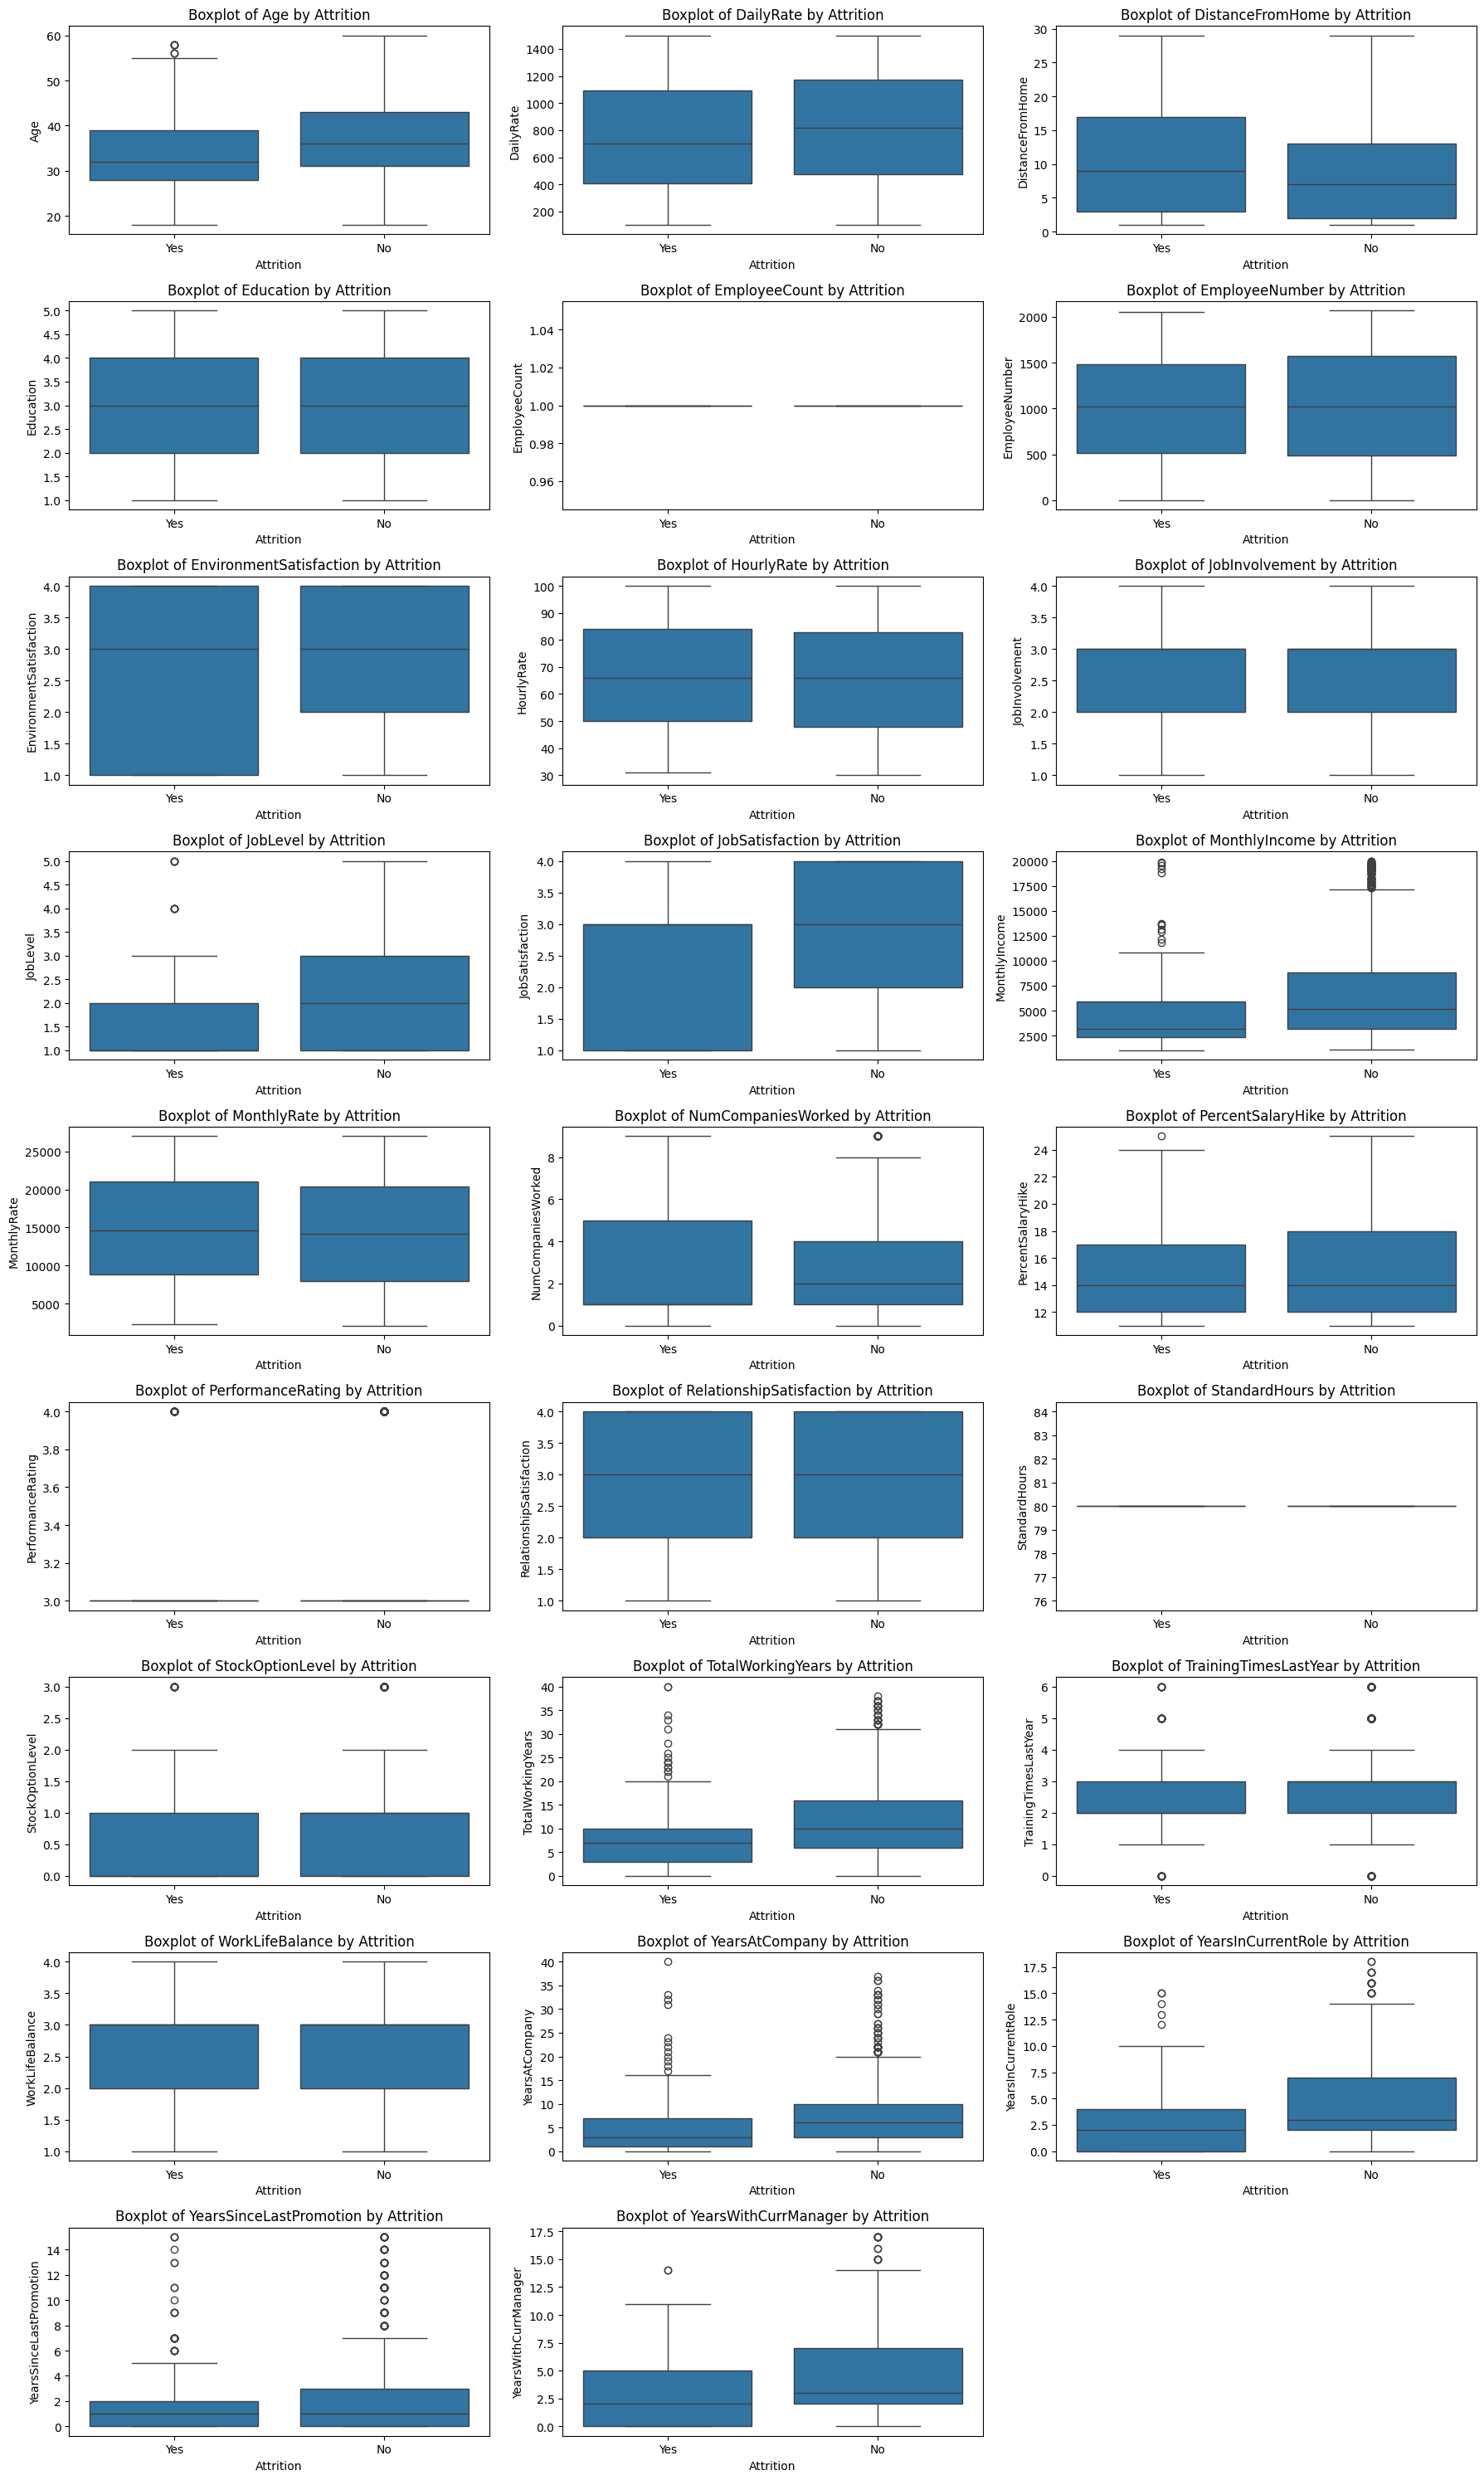

In [149]:
plt.figure(figsize=(18, 30))
for i, col in enumerate(df_num, 1):
    plt.subplot(len(df_num) // 3 + 1, 3, i)
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'Boxplot of {col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


In [150]:
df_cleaned = df.drop(columns=cols_drop)

In [151]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [152]:
# Manually define ordinal categorical columns
ordinal_cols = {
    "Education": {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"},
    "EnvironmentSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobInvolvement": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "JobSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "PerformanceRating": {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"},
    "RelationshipSatisfaction": {1: "Low", 2: "Medium", 3: "High", 4: "Very High"},
    "WorkLifeBalance": {1: "Bad", 2: "Good", 3: "Better", 4: "Best"}
}

# Replace ordinal column integer values with corresponding category labels
for col, mapping in ordinal_cols.items():
    df_cleaned[col] = df_cleaned[col].replace(mapping)

# Convert ordinal columns to categorical dtype for proper identification
for col in ordinal_cols.keys():
    df_cleaned[col] = df_cleaned[col].astype("category")

In [164]:
for col in df_cleaned.select_dtypes(include=['object','bool']).columns:
    df_cleaned[col], _ = pd.factorize(df_cleaned[col])

In [160]:
df_cleaned['Attrition'] = df_cleaned['Attrition'].map({'Yes': 1, 'No': 0})

In [161]:
X = df_cleaned.drop(columns = 'Attrition')
y = df_cleaned['Attrition']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [166]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,47,Travel_Rarely,1225,Sales,2,Master,Life Sciences,Medium,Female,47,...,Excellent,High,3,29,2,Better,3,2,1,2
128,22,Travel_Rarely,594,Research & Development,2,Below College,Technical Degree,High,Male,100,...,Excellent,High,1,3,2,Better,2,1,2,1
810,46,Travel_Rarely,406,Sales,3,Below College,Marketing,Low,Male,52,...,Excellent,Very High,1,23,3,Better,12,9,4,9
478,25,Travel_Rarely,622,Sales,13,Below College,Medical,Medium,Male,40,...,Excellent,High,0,7,1,Better,7,4,0,6
491,43,Travel_Frequently,1001,Research & Development,9,Doctor,Medical,Very High,Male,72,...,Excellent,Medium,1,10,3,Better,8,7,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,23,Travel_Rarely,427,Sales,7,Bachelor,Life Sciences,High,Male,99,...,Outstanding,Medium,1,3,2,Better,3,2,0,2
963,38,Travel_Rarely,1009,Sales,2,College,Life Sciences,Medium,Female,31,...,Excellent,Very High,1,11,3,Better,7,7,1,7
734,22,Travel_Rarely,217,Research & Development,8,Below College,Life Sciences,Medium,Male,94,...,Excellent,Low,1,4,3,Good,4,3,1,1
1315,36,Travel_Rarely,430,Research & Development,2,Master,Other,Very High,Female,73,...,Outstanding,Very High,1,15,2,Better,1,0,0,0


In [165]:
print("XGBoost version:", xgb.__version__)

clf = xgb.XGBClassifier( 
    n_estimators=500,
    max_depth=12, 
    learning_rate=0.2, 
    subsample=0.8,
    colsample_bytree=0.4, 
    eval_metric= 'aucpr',
    nthread=4,
    tree_method='hist',  # Use CPU if GPU is not available
    #tree_method='gpu_hist' # Use GPU if GPU is available
    early_stopping_rounds=10
)
h = clf.fit(X_train, y_train, 
    eval_set=[(X_test,y_test)],
    verbose=50)

XGBoost version: 3.0.2


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:BusinessTravel: object, Department: object, Education: category, EducationField: object, EnvironmentSatisfaction: category, Gender: object, JobInvolvement: category, JobRole: object, JobSatisfaction: category, MaritalStatus: object, OverTime: object, PerformanceRating: category, RelationshipSatisfaction: category, WorkLifeBalance: category